## Convolutional Neural Network Using SVM as Final Layer

### Understanding Of SVM

- Part 1: https://www.youtube.com/watch?v=H9yACitf-KM
- Part 2: https://www.youtube.com/watch?v=Js3GLb1xPhc

In [1]:
from zipfile import ZipFile
file_name = "Face Mask Detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.4.1'

In [5]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [6]:
training_set = train_datagen.flow_from_directory('/content/Face Mask Detection/Face Mask Detection Using Computer Vision/Raw Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/Face Mask Detection/Face Mask Detection Using Computer Vision/Raw Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [8]:
from tensorflow.keras.regularizers import l2

In [15]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
#cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - SVM instead of FCN
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [16]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2049      
Total params: 12,193
Trainable params: 12,193
Non-trainable params: 0
__________________________________________________

In [17]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
42/42 [==============================] - 10s 240ms/step - loss: 0.9584 - accuracy: 0.5182 - val_loss: 0.5658 - val_accuracy: 0.7268
Epoch 2/50
42/42 [==============================] - 10s 235ms/step - loss: 0.5209 - accuracy: 0.7580 - val_loss: 0.3094 - val_accuracy: 0.9227
Epoch 3/50
42/42 [==============================] - 10s 235ms/step - loss: 0.2462 - accuracy: 0.9039 - val_loss: 0.2027 - val_accuracy: 0.9381
Epoch 4/50
42/42 [==============================] - 10s 233ms/step - loss: 0.2187 - accuracy: 0.8971 - val_loss: 0.1547 - val_accuracy: 0.9175
Epoch 5/50
42/42 [==============================] - 10s 234ms/step - loss: 0.1578 - accuracy: 0.9418 - val_loss: 0.1400 - val_accuracy: 0.9433
Epoch 6/50
42/42 [==============================] - 10s 234ms/step - loss: 0.1500 - accuracy: 0.9463 - val_loss: 0.1392 - val_accuracy: 0.9588
Epoch 7/50
42/42 [==============================] - 10s 234ms/step - loss: 0.1558 - accuracy: 0.9431 - val_loss: 0.1229 - val_accuracy: 0.9485

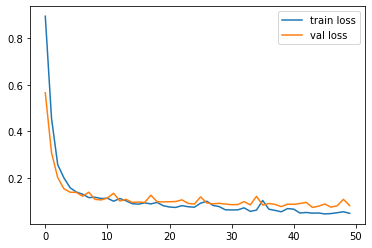

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('mask_detection_model.h5')

In [20]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('mask_detection_model.h5')

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2049      
Total params: 12,193
Trainable params: 12,193
Non-trainable params: 0
__________________________________________________

In [45]:
import cv2
from google.colab.patches import cv2_imshow

In [58]:
def detectMask(result,img):

  resized=cv2.resize(img,(400,400),interpolation=cv2.INTER_AREA)

  # font 
  font = cv2.FONT_HERSHEY_SIMPLEX 

  # org 
  org = (50, 50) 

  # fontScale 
  fontScale = 1

  # Blue color in BGR 
  color = (255, 0, 0) 

  # Line thickness of 2 px 
  thickness = 2

  if(result>0):

    img = cv2.putText(resized, 'Mask:No', org, font, 
				fontScale, color, thickness, cv2.LINE_AA) 
    
  else:
    img = cv2.putText(resized, 'Mask:Yes', org, font, 
				fontScale, color, thickness, cv2.LINE_AA) 
  
  cv2_imshow(resized)
  cv2.waitKey(0)
  cv2.destroyAllWindows() 
    
 
    

In [59]:
# Part 4 - Prediction for mask-yes

import numpy as np
from tensorflow.keras.preprocessing import image

path='/content/mp.jpeg'

img=cv2.imread(path)

test_image = image.load_img(path,target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [60]:
result[0]

array([-7.719925], dtype=float32)

In [61]:
detectMask(result[0],img)

In [63]:
# Part 4 - Prediction for mask-no

import numpy as np
from tensorflow.keras.preprocessing import image

path='/content/ump.jpeg'

img=cv2.imread(path)

test_image = image.load_img(path,target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [64]:
result[0]

array([1.2960376], dtype=float32)

In [65]:
detectMask(result[0],img)